# Data Description:
The data at hand contains medical costs of people characterized by certain attributes.

# Domain:
Healthcare

# 1. Import the necessary libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

# 2. Read the data as a data frame

In [109]:
missing_values = ["n/a", "na", "--", "-", " "]
ins_df = pd.read_csv("C:/Users/srivi/Downloads/insurance.csv",na_values = missing_values)
ins_df1 = ins_df

In [110]:
ins_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Perform basic EDA which should include the following and print out your insights at every step.

# a. Shape of the data

In [111]:
print("# of (instance,features) in the data set :",ins_df.shape)

# of (instance,features) in the data set : (1338, 7)


# b. Data type of each attribute

In [112]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Insight:
Feature - sex, smoker and region are categorical. 
Feature - age, bmi, children and charges are numeric.

# c. Checking the presence of missing values

In [113]:
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Insight:
There are no missing values in the data set 

In [114]:
ins_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [115]:
ins_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [116]:
ins_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Insight:
All the categorical columns have correct values

# d. 5 point summary of numerical attributes

Convert categorical coulmns to numeric if possible before doing the 5 point summary

In [117]:
ins_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [118]:
ins_df.sex.replace({'female':0, 'male':1},inplace=True)
ins_df.smoker.replace({'yes':1, 'no':0},inplace=True)
ins_df.region.replace({'southeast':1, 'southwest':2, 'northwest':3, 'northeast':4},inplace=True)

In [119]:
ins_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,4,6406.41070
9,60,0,25.840,0,0,3,28923.13692


In [120]:
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,2.455157,1.130197,1.0000,1.00000,2.000,3.000000,4.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

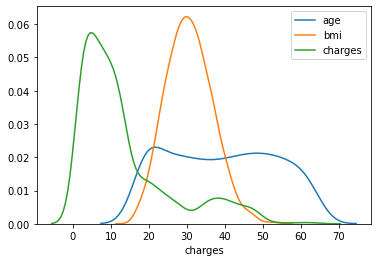

In [121]:
sns.distplot(ins_df['age'],hist=False,label='age')
sns.distplot(ins_df['bmi'],hist=False,label='bmi')
dfcharge = ins_df['charges']/1000
sns.distplot(dfcharge,hist=False,label='charges')

# Insight:
From the above visualization we see that, 
bmi column is normally distributed. 
age is not normally distributed. 
charges is right skewed. 

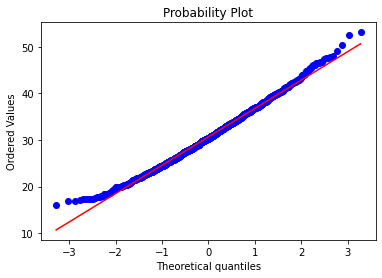

In [122]:
stats.probplot(ins_df['bmi'], dist="norm", plot=pylab)
pylab.show()

# Insight:
By looking at the probability plot we can conclude that, bmi is normally distributed

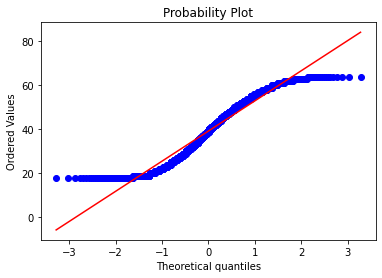

In [123]:
stats.probplot(ins_df['age'], dist="norm", plot=pylab)
pylab.show()

# Insight:
By looking at the probability plot we can conclude that, age is not normally distributed

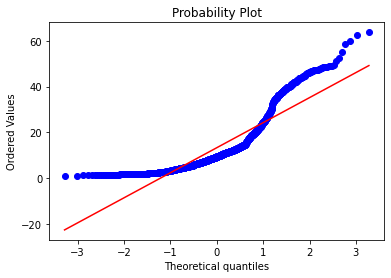

In [124]:
stats.probplot(dfcharge, dist="norm", plot=pylab)
pylab.show()

# Insight:
By looking at the probability plot we can conclude that, charges is not normally distributed

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [125]:
print("Measure of skewness of bmi:",ins_df.bmi.skew())

Measure of skewness of bmi: 0.2840471105987448


# Insight:
If the value is positive then the distribution is right skewed hence we conclude that bmi is slightly right skewed

In [126]:
print("Measure of skewness of age:",ins_df.age.skew())

Measure of skewness of age: 0.05567251565299186


# Insight:
If the value is positive then the distribution is right skewed here the value is close to zero hence age is not that skewed

In [127]:
print("Measure of skewness of charges:",ins_df.charges.skew())

Measure of skewness of charges: 1.5158796580240388


# Insight:
If the value is positive then the distribution is right skewed hence charges is right skewed

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

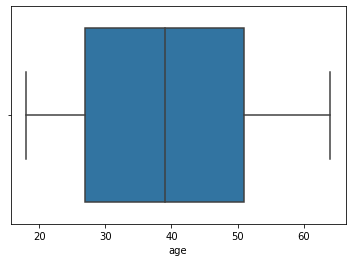

In [128]:
sns.boxplot(ins_df['age'])

# Insight:
We can see from the box plot that there are no data points before minimum and after maximum hence there are no lower and upper outliers

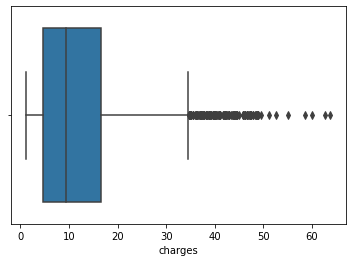

In [129]:
sns.boxplot(dfcharge)

# Insight:
We can see from the box plot that there are no data points before minimum and but there are data points after maximum hence there are no lower outliers but there are upper outliers

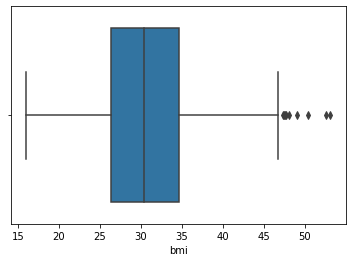

In [130]:
sns.boxplot(ins_df['bmi'])

# Insight:
We can see from the box plot that there are no data points before minimum and but there are data points after maximum hence there are no lower outliers but there are upper outliers

# h. Distribution of categorical columns (include children)

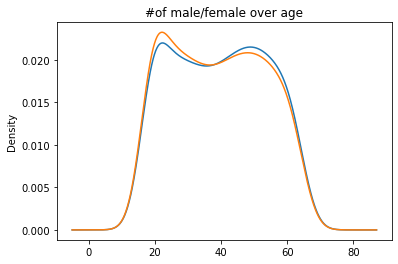

In [131]:
ax = ins_df1.groupby('sex').age.plot(kind='kde',title='#of male/female over age')

Text(0.5, 1.0, 'Distribution of male/female over age')

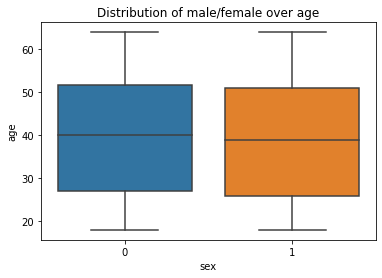

In [132]:
sns.boxplot(x='sex',y='age',data=ins_df1).set_title('Distribution of male/female over age')

# Insight:
Male and female are almost equally distributed and no outliers

smoker
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

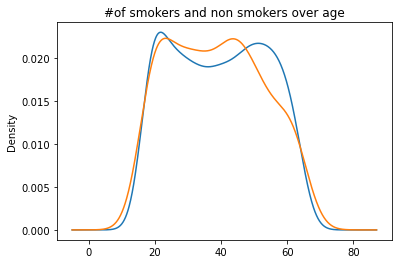

In [133]:
ins_df1.groupby('smoker').age.plot(kind='kde',title='#of smokers and non smokers over age')

Text(0.5, 1.0, 'distribution of smoker/non-smoker over age')

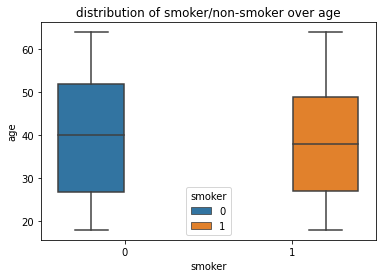

In [134]:
sns.boxplot(x='smoker',y='age',data=ins_df1,hue='smoker').set_title('distribution of smoker/non-smoker over age')

# Insight:
smoker and non smoker over the age are almost equally distributer and no outliers

Text(0.5, 1.0, 'Region vs bmi distribution')

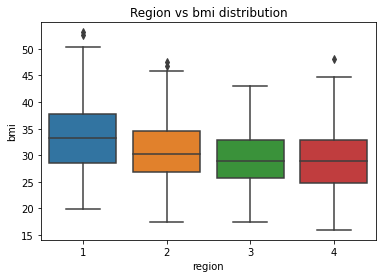

In [135]:
sns.boxplot(x='region',y='bmi',data=ins_df1).set_title('Region vs bmi distribution')

# Insight:
There are outliers for region 1, 2 and 4 and no outliers for region 3.

Text(0.5, 1.0, 'count of # of children over region')

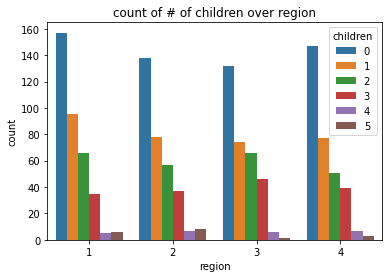

In [136]:
sns.countplot(x="region",hue="children", data=ins_df1).set_title('count of # of children over region')

# i. Pair plot that includes all the columns of the data frame

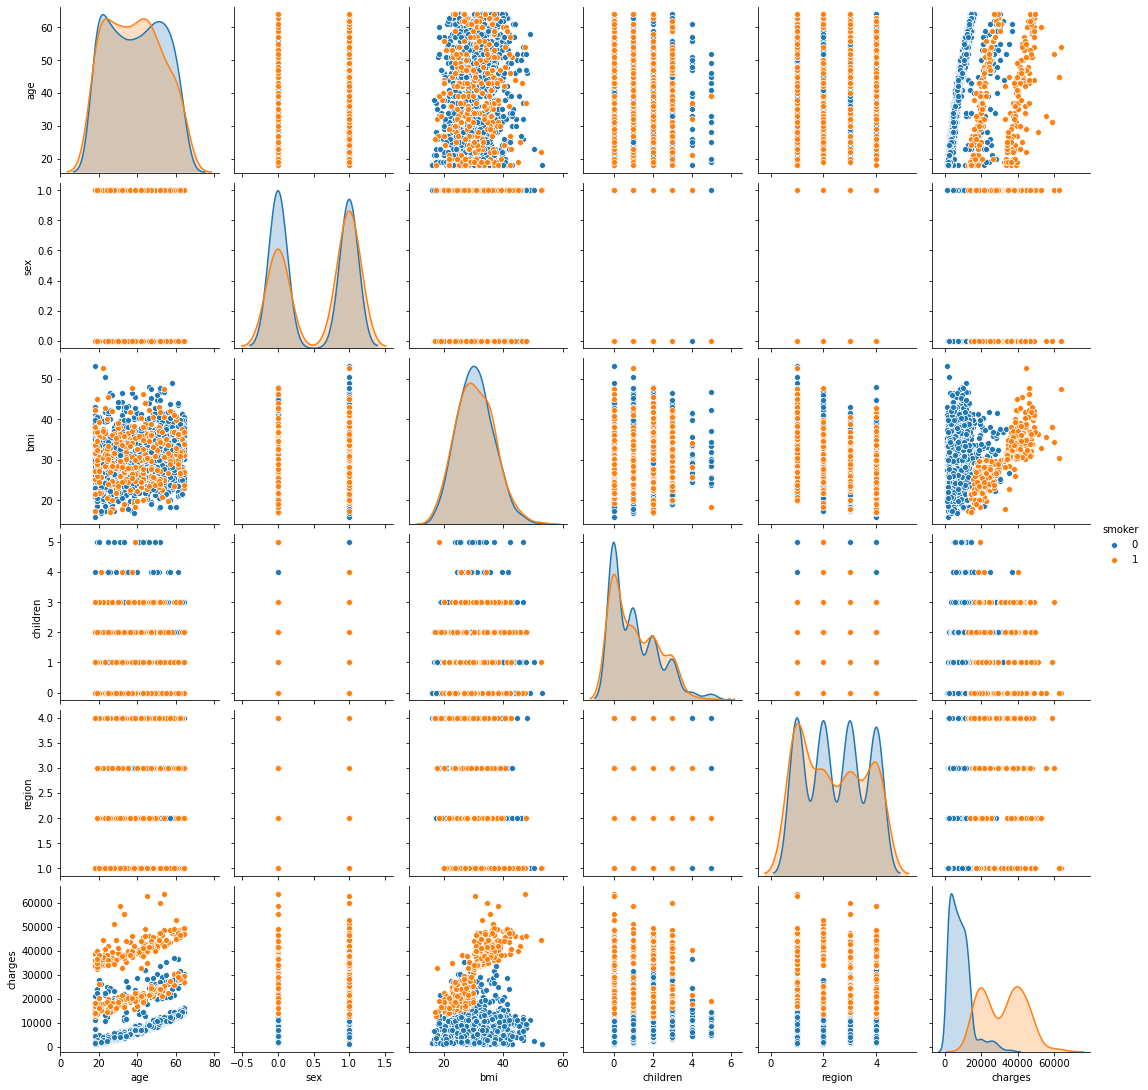

In [137]:
sns.pairplot(data=ins_df1,hue='smoker')

C:\Users\srivi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\srivi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\srivi\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


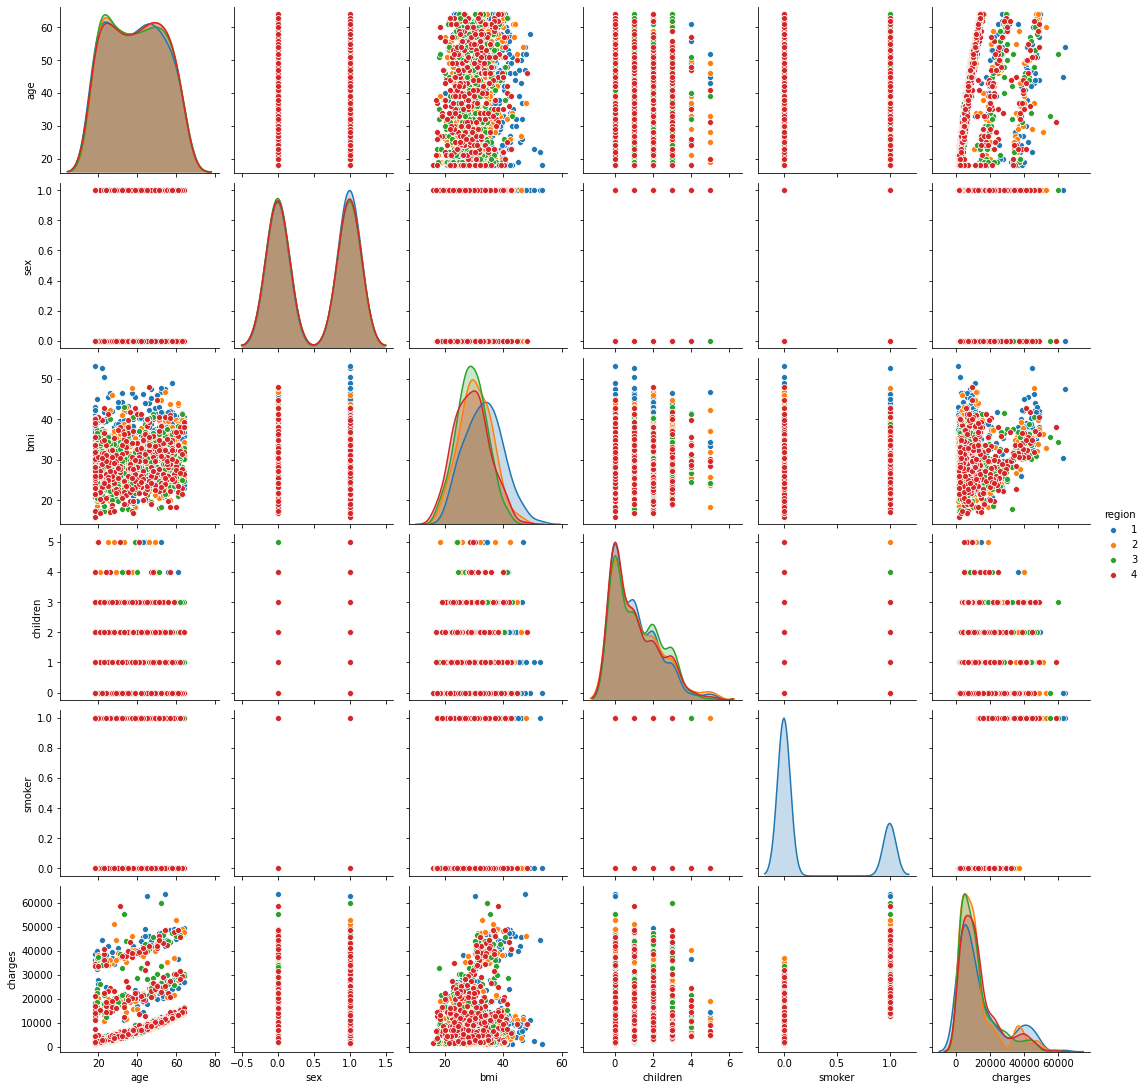

In [138]:
sns.pairplot(data=ins_df1,hue='region')

# 4. Answer the following questions with statistical evidence

# a. Do charges of people who smoke differ significantly from the people who don't?

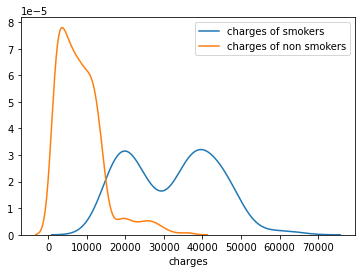

In [139]:
smoker_charges = ins_df[ins_df['smoker'] == 1]['charges']
non_smoker_charges = ins_df[ins_df['smoker'] == 0]['charges']
sns.distplot(smoker_charges,hist=False,label='charges of smokers')
sns.distplot(non_smoker_charges,hist=False,label='charges of non smokers')

In [140]:
print(stats.shapiro(smoker_charges))
#print(stats.anderson(smoker_charges))
#print(stats.normaltest(smoker_charges))

ShapiroResult(statistic=0.9395521879196167, pvalue=3.6251879276250065e-09)


In [141]:
print(stats.shapiro(non_smoker_charges))
#print(stats.anderson(non_smoker_charges))
#print(stats.normaltest(non_smoker_charges))

ShapiroResult(statistic=0.8728628158569336, pvalue=1.4455900162299346e-28)


In [142]:
stats.mannwhitneyu(smoker_charges,non_smoker_charges)

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

# Insight:
From the distribution we see that charges of smoker and charges of non-smoker are not normally distributed

From the shapiro test of smoker charges, since p value is less than 0.05 we reject null and hence distribution is not normal

From the shapiro test of non smoker charges, since p value is less than 0.05 we reject null and hence distribution is not normal

So non-parametric test was performed

Null Hypothesis - charges of people who smoke is same from the people who don't.

Alternate Hypothesis - charges of people who smoke differ significantly from the people who don't.

from mann whitney test, since the p value is less than 0.05 we reject null, hence charges of people who smoke differ significantly from the people who don't

In [143]:
#norm_smoker_charges = stats.boxcox(smoker_charges)
#print(norm_smoker_charges[0])
#stats.shapiro(norm_smoker_charges[0])

In [144]:
#norm_non_smoker_charges = stats.boxcox(non_smoker_charges)
#stats.shapiro(norm_non_smoker_charges[0])

In [145]:
#sns.distplot(norm_smoker_charges[0],hist=False,label='charges of smokers')
#sns.distplot(norm_non_smoker_charges[0],hist=False,label='charges of non smokers')

# b. Does bmi of males differ significantly from that of females

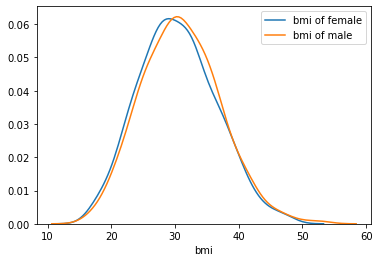

In [146]:
female_bmi = ins_df[ins_df['sex'] == 0]['bmi']
male_bmi = ins_df[ins_df['sex'] == 1]['bmi']
sns.distplot(female_bmi,hist=False,label='bmi of female')
sns.distplot(male_bmi,hist=False,label='bmi of male')

In [147]:
print(stats.shapiro(male_bmi))
print(stats.shapiro(female_bmi))

ShapiroResult(statistic=0.9930475354194641, pvalue=0.003130641533061862)
ShapiroResult(statistic=0.9930257797241211, pvalue=0.0035433683078736067)


In [148]:
#stats.probplot(male_bmi, dist="norm", plot=pylab)
#print(male_bmi.dtype)

In [149]:
stats.ttest_ind(male_bmi,female_bmi)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

In [150]:
stats.mannwhitneyu(male_bmi,female_bmi)

MannwhitneyuResult(statistic=212180.0, pvalue=0.05070064020142721)

# Insight:
Let level of significance α be 5%

Null Hypothesis - Bmi of male and female are same

Alternate Hypothesis - Bmi of male and female differ significantly

From shapiro test, P value is less than 0.05 says the distribution is not normal.

From the ttest, Since p value is greater than 0.05 we fail to reject null and hence bmi of male and female are same

From shapiro test, P value is less than 0.05 says the distribution is not normal and performing non-parametric, man whitney u test gave same result. P value is slightly greater 0.05 we fail to reject null and hence hence bmi of male and female are same


# c. Is the proportion of smokers significantly different in different genders?

In [151]:
pd.crosstab(ins_df['smoker'],ins_df['sex'])


sex,0,1
smoker,,
0,547,517
1,115,159


In [152]:
arr1=np.array([[547],[115]])
print(stats.chi2_contingency(arr1))

arr2=np.array([[547,517],[115,159]])
print(stats.chi2_contingency(arr2))


(0.0, 1.0, 0, array([[547.],
       [115.]]))
(7.39291081459996, 0.006548143503580696, 1, array([[526.43348281, 537.56651719],
       [135.56651719, 138.43348281]]))


# Insight:
    
Let level of significance α be 5%

Null hypothesis: proportion of smokers are same in different genders
    
Alternate hypothesis: proportion of smokers significantly different in different genders
    
Since p value is less than 0.05 i.e 0.0065 we reject null and hence proportion of smokers are different in different genders

# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [153]:
women = ins_df[ins_df['sex']==0]
children_0_bmi = women[women['children']==0]['bmi']
children_1_bmi = women[women['children']==1]['bmi']
children_2_bmi = women[women['children']==2]['bmi']


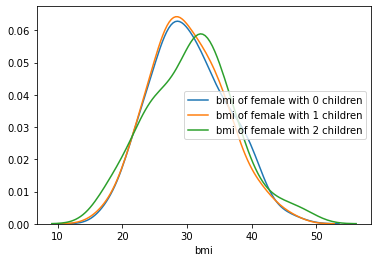

In [154]:
sns.distplot(children_0_bmi,hist=False,label='bmi of female with 0 children')
sns.distplot(children_1_bmi,hist=False,label='bmi of female with 1 children')
sns.distplot(children_2_bmi,hist=False,label='bmi of female with 2 children')

In [155]:
print(stats.shapiro(children_0_bmi))
print(stats.shapiro(children_1_bmi))
print(stats.shapiro(children_2_bmi))
print(stats.levene(children_0_bmi,children_1_bmi,children_2_bmi,center='median'))

ShapiroResult(statistic=0.9896312355995178, pvalue=0.03757598251104355)
ShapiroResult(statistic=0.9921025037765503, pvalue=0.5361911654472351)
ShapiroResult(statistic=0.9860439300537109, pvalue=0.2596229910850525)
LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)


In [156]:
stats.f_oneway(children_0_bmi,children_1_bmi,children_2_bmi)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [157]:
stats.kruskal(children_0_bmi,children_1_bmi,children_2_bmi)

KruskalResult(statistic=0.713793799408396, pvalue=0.699844648205425)

# Insights:
    
Let level of significance α be 5%

Null hypothesis: distribution of bmi across women with no children, one child and two children are same

Alternate hypothesis: distribution of bmi across women with no children, one child and two children are different

From levenes test we see that the variance of 3 samples are same

From one way ANOVA test, Since p value is greater than 0.05 i.e. 0.7158 we fail to reject null hence distribution of bmi across women with no children, one child and two children are same

But since the data is not exactly normal for one sample, from non parametric kurskal test we get the same result. Since p value is greater than 0.05 i.e. 0.6998 we fail to reject null hence distribution of bmi across women with no children, one child and two children are same